# Seisflows legacy installation
### Prepared by Andrea C. Riaño

## Prerequisites 
To run SeisFlows you’ll need:
- Python 2.7  
- Numpy  
- Scipy   
- Obspy    

To check if Python 2.7 version is installed: 
python --version 
(python3 -- for the version of Python 3 )

If no version of python 2.7 is installed follow the instructions in the following link for your corresponding operative system.

https://www.python.org/download/releases/2.7/ 

We can create a new environment to use Python 2.7. Once the environment is activated, the packages needed can be downloaded. 
 ``` python
conda create -n py2 python=2.7 
conda deactivate
conda activate py2
 ``` 
Check the list of packages available in the environment 

 ``` python
conda list 
``` 

Installing the required packages in the environment can be done with conda or pip 
 ``` python
conda install numpy
conda install obspy
pip install spicy
```

## Seisflows installation
Installation instructions are available at:   
https://github.com/adjtomo/seisflows/blob/46a9604d8907bc5fbf2ddc11e16914a870e6db77/docs/instructions_remote.rst
They are displayed below for convenience. 

- SPECFEM2D (version d745c542) will be installed in step 5. First, make sure that gfortran is installed on your computer. If your operative system is iOS, look for the version of gfortran compatible with the version of XCODE installed. If you don't have XCODE installed, download it from the App Store and install the Command Line Tools (CLT). If the error "Fortran compiler cannot create executables" is prompted during the compilation of SPECFEM2D, uninstall and re-install CLT. Instructions for this can be found in the following video: 
https://youtu.be/8n_AfrQjgp4

- in MAC you might encounter with the following compilation error: 

    gfortran -g -O2 -J./obj -I./obj -I. -std=f2003 -fimplicit-none -frange-check -fmax-errors=10 -pedantic -pedantic-errors -Waliasing -Wampersand -Wcharacter-truncation -Wline-truncation -Wsurprising -Wno-tabs -Wunderflow -ffpe-trap=invalid,zero,overflow -Wunused -Werror -O3 -I./setup -c -o obj/adj_seismogram.aux.o src/auxiliaries/adj_seismogram.f90
    src/auxiliaries/adj_seismogram.f90:62:36:

   62 |   double precision :: seism(NSTEP,3),Nnorm,seism_win(NSTEP)
      |                                    1
    Error: Array ‘seism’ at (1) is larger than limit set by ‘-fmax-stack-var-size=’, moved from stack to static storage. This makes the procedure unsafe when called recursively, or concurrently from multiple threads. Consider using ‘-frecursive’, or increase the ‘-fmax-stack-var-size=’ limit, or change the code to use an ALLOCATABLE array. [-Werror=surprising]
    f951: all warnings being treated as errors
    make: *** [obj/adj_seismogram.aux.o] Error 1
 
    </b> to fix this error run the configure including the following fortran flag FCFLAGS=-frecursive </b>  
    <b> ./configure FC=gfortran CC=gcc FCFLAGS=-frecursive </b>  
    <b> make all </b>  
    
    
- Step 6 provides a link to a repository that is not currently available. The starting model can be found now at: https://github.com/rmodrak/seisflows/blob/master/README.md and select the "2D acoustic checkerboard"

### Installation instructions 

1. Download SeisFlows
---------------------

To run SeisFlows you'll need a Unix system with Python 2.7, Numpy, Scipy, Obspy and standard Unix utilities.  After these prerequisites are in place, from the command line type::
 
        mkdir ~/packages
        cd ~/packages
        git clone https://github.com/rmodrak/seisflows.git

If you prefer a location other than ``~/packages`` , modify the commands above and below accordingly.


2. Set environment variables
----------------------------

Add the following lines to ``~/.bashrc`` (modify accordingly, if you are using a shell other than bash)::

        export PATH=$PATH:~/packages/seisflows/scripts
        export PYTHONPATH=~/packages/seisflows
 

Don't forget to update any open shells::

        source ~/.bashrc
 

 

3. Run "system" test
---------------------

 
Run the following test to make sure everything is working::

        ~/packages/seisflows/tests/run_test_system


If a ''hello'' message is displayed, the test was successful.

 

 

4. Run nonlinear optimization test
----------------------------------


Run the following test to make sure everything is working::

        ~/packages/seisflows/tests/run_test_optimize


If the optimization problems are solved in 60 iterations or fewer, the test was successful.

 

 

5. Configure and compile SPECFEM2D
----------------------------------

First, download SPECFEM2D from GitHub::

        cd ~/packages
        git clone --recursive --branch devel https://github.com/geodynamics/specfem2d.git specfem2d-d745c542
        cd specfem2d-d745c542
        git checkout d745c542

For now, it is important to work with the exact version specified above (``d745c542``). This is necessary because, unlike SPECFEM3D and 3D_GLOBE, SPECFEM2D development is sometimes a bit haphazard, with frequent interface changes.


Next, configure and compile SPECFEM2D using ifort (preferred) or some other fortran compiler::

        cd ~/packages/specfem2d-d745c542
        ./configure FC=ifort
        make all

(Since `make` by itself does not compile all the required utilities, be sure to remember to type `make all`.)  For troubleshooting any compilation issues, please view SPECFEM2D's manual and GitHub issues page.
 


6. Set up checkerboard test
---------------------------
 
*Note: the princeton.edu file hosting account has expired, and so these instructions have changed slightly.*

Download the starting model and other input files from `GoogleDrive <https://drive.google.com/open?id=1ow3LTYEvNn55yGeIV56sqaW-wXC0MtYW>`.  Unpack the archive using ``tar -xzf checkers.tgz``.

After unpacking, make sure that all paths specified in ``paths.py``  are correct.  For example, if you compiled SPECFEM2D somewhere other than ``~/packages/specfem2d-d745c542``, you will need to modify the ``SPECFEM2D_BIN`` entry accordingly. 

Next, take a minute to view the ``parameters.py`` file and note the close similarity between the first set of parameters and the `directory structure <https://github.com/PrincetonUniversity/seisflows/tree/master/seisflows>`_ of the SeisFlows repository.

 
7. Run checkerboard test in serial
----------------------------------

To run the checkerboard test type::

        sfclean ; sfrun

within ``~/tests/checkers``.

For now, the inversion will run only a single event on only a single processor.  Once we verify that everything is working correctly in this case, we can move on to multiple events and multiple processors by modifying ``parameters.py``.



8. Run checkerboard test in parallel
-----------------------------------------
On a laptop or desktop with multiple cores, the work of an inversion can be carried out in parallel.  To run the checkerboard example in parallel over events (that is, with multiple event simulations running at the same time on different cores), make the following changes to ``parameters.py``:

- to invert all available events instead of just one event, change ``NTASK`` from ``1`` to ``25``
- change ``SYSTEM`` from ``serial`` to ``multithreaded``
- add a parameter ``NPROCMAX`` and set it to the number of cores available on your machine.

Besides running in parallel over events, the work of an individual event simulation can be parallelized over model regions. See the SPECFEM3D user manual for more information. Both parallelization over events and over model regions can be used at the same time under SeisFlows.  The current example, however, illustrates only event parallelism.

Besides ``serial`` and ``multithreaded`` settings for running SeisFlows on laptops and desktops, there are also PBS, SLURM, and LSF options for running on clusters. See `here <http://seisflows.readthedocs.org/en/latest/usage/usage.html#system-configuration>`_ for more information.


9. Visualize inversion results
------------------------------

Visualization requires software such as Pylab, Matlab, or Paraview.

With any such software, one approach for plotting SPECFEM2D models or kernels is to interpolate from the unstructured numerical mesh on which the model parameters are defined to a uniform rectangular grid.  The Pylab script `plot2d <http://tigress-web.princeton.edu/~rmodrak/visualize/plot2d>`_ illustrates this approach.


Another method is to compute a Delaunay triangulation and plot the model or kernel over the unstructured mesh itself.  A Pylab script `plot2d_delaunay <http://tigress-web.princeton.edu/~rmodrak/visualize/plot2d_delaunay>`_ is available for illustration.

To plot results from the checkerboard example using ``plot2d``, run the following command from the working directory::

          plot2d output/model_init/proc000000_x.bin \
                 output/model_init/proc000000_z.bin \
                 output/model_0001/proc000000_vs.bin

(The command line syntax is the same for the other script.)  For either script to work, Pylab must be installed and the Pylab backend properly configured. If you prefer visualization software other than Pylab, feel free to use the above scripts for reference in writing your plotting own tools. 


10. Creating your own examples
------------------------------
With SeisFlows, wave simulations must be performed using an external software package such as SPECFEM2D or SPECFEM3D.  The ability to interface with external solvers ensures flexibility, and the choice of SPECFEM as a default option gives access to cutting-edge meshing and hardware accelaration capabilities.  However, the use of external package also creates additional work for the user because, to carry set up one's own inversion, one must become familiar not only with the SeisFlows package, but also with a separate solver package.  

To move beyond the above checkerboard test case, familiarity with how to set up simulations with SPECFEM--in paricular with how to create models in SPECFEM's idionsyncratic binary format--is essential.  `Issue #83 <https://github.com/rmodrak/seisflows/issues/83>`_ may be helpful in this regard.  Trying the two other `examples available for download <https://github.com/rmodrak/seisflows/blob/master/docs/index.rst#examples-available-for-download>`_ may also be useful.

## Creating your own example 


### Input parameters 

1. You will need the binary files that describe your model_true (observed) and model_init (synthetics). To create these files, you can use the latest version of specfem2d and change "default" to "binary" in the SAVE_MODEL input parameter.  

    SAVE_MODEL = binary  

    Run the forward simulation. The files will be stored in the DATA folder. copy and paste these files to the folder where you will run seisflows, for instance: ~/tests/2DFWI  
    
    
2. Create the Par_file, SOURCE, and STATIONS files in the directory of specfem2d-d745c542. The format of these files change between the latest version of sepecfem2d and specfem2d-d745c542, so use as a template the files provided in checkers (~/tests/checkers). The files used to simulate three sources and three receivers in a homogeneous layer with a reflecting top layer are shown below. 

In [2]:
# %load DATA/Par_file

title                           = homogeneous 

AXISYM                          = .false.


SIMULATION_TYPE                 = 1   
NOISE_TOMOGRAPHY                = 0   
SAVE_FORWARD                    = .false.  

UNDO_ATTENUATION                = .false.
NT_DUMP_ATTENUATION             = 500

nproc                           = 1              
partitioning_method             = 3              
PERFORM_CUTHILL_MCKEE           = .false.        

ngnod                           = 4              
initialfield                    = .false.        
add_Bielak_conditions           = .false.        

MODEL                           = binary

ATTENUATION_VISCOELASTIC_SOLID  = .false.        
ATTENUATION_PORO_FLUID_PART     = .false.        
Q0                              =  1             
freq0                           =  10            
p_sv                            = .false.        


nt                              = 3000           
deltat                          = 1.0d-3         
USER_T0                         = 0.0d0         
time_stepping_scheme            = 1   

ACOUSTIC_FORCING                = .false.


NSOURCES                        = 1              
force_normal_to_surface         = .false.        


N_SLS                           = 3                      
f0_attenuation                  = 5.196152422706633      
READ_VELOCITIES_AT_f0           = .false.


seismotype                      = 1              
USE_TRICK_FOR_BETTER_PRESSURE   = .false.
NSTEP_BETWEEN_OUTPUT_SEISMOS    = 5000000        
save_ASCII_seismograms          = .false.        
save_binary_seismograms_single  = .true.         
save_binary_seismograms_double  = .false.        
SU_FORMAT                       = .true.        
subsamp_seismos                 = 1              
use_existing_STATIONS           = .true.
nreceiversets                   = 1
anglerec                        = 0.d0           
rec_normal_to_surface           = .false.        
save_ASCII_kernels              = .false.


nrec                            =    1  
xdeb                            =  0.0
zdeb                            =  0.0
xfin                            =  0.0
zfin                            =  0.0
enreg_surf_same_vertical        = .false.         


NSTEP_BETWEEN_OUTPUT_INFO       = 400            

NSTEP_BETWEEN_OUTPUT_IMAGES     = 100            
cutsnaps                        = 1.             


output_color_image              = .false.
imagetype_JPEG                  = 3              
factor_subsample_image          = 1              
USE_CONSTANT_MAX_AMPLITUDE      = .false.
CONSTANT_MAX_AMPLITUDE_TO_USE   = 1.17d4
POWER_DISPLAY_COLOR             = 0.30d0         
DRAW_SOURCES_AND_RECEIVERS      = .true.         
DRAW_WATER_IN_BLUE              = .true.         
USE_SNAPSHOT_NUMBER_IN_FILENAME = .false.        


output_postscript_snapshot      = .false.         
imagetype_postscript            = 1              
meshvect                        = .false.        
modelvect                       = .false.        
boundvect                       = .true.         
interpol                        = .true.         
pointsdisp                      = 6              
subsamp_postscript              = 1              
sizemax_arrows                  = 1.d0           
US_LETTER                       = .false.        


NSTEP_BETWEEN_OUTPUT_WAVE_DUMPS = 100            
output_wavefield_dumps          = .false.        
imagetype_wavefield_dumps       = 1              
use_binary_for_wavefield_dumps  = .false.        

output_grid_Gnuplot             = .false.        
output_grid_ASCII               = .false.        
output_energy                   = .false.        


nbmodels                        = 1              
1 1 2700.d0 3000.d0 1750.0d0 0 0 9999 9999 0 0 0 0 0 0

TOMOGRAPHY_FILE                 = none

read_external_mesh              = .false.


PML_BOUNDARY_CONDITIONS         = .false.
NELEM_PML_THICKNESS             = 3
ROTATE_PML_ACTIVATE             = .false.
ROTATE_PML_ANGLE                = 30.
STACEY_ABSORBING_CONDITIONS     = .true.
ADD_SPRING_TO_STACEY            = .false.


ADD_PERIODIC_CONDITIONS         = .false.


PERIODIC_HORIZ_DIST             = 0.3597d0


PERIODIC_DETECT_TOL             = 3.3334d-6

GPU_MODE                        = .false.






mesh_file                       = ./DATA/Mesh_canyon/canyon_mesh_file
nodes_coords_file               = ./DATA/Mesh_canyon/canyon_nodes_coords_file
materials_file                  = ./DATA/Mesh_canyon/canyon_materials_file
free_surface_file               = ./DATA/Mesh_canyon/canyon_free_surface_file
absorbing_surface_file          = ./DATA/Mesh_canyon/canyon_absorbing_surface_file
CPML_element_file               = EltPML_xxxxxx
tangential_detection_curve_file = ./DATA/courbe_eros_nodes





interfacesfile                  = interfaces_simple_topo_flat_Andrea.dat


xmin                            = 0.d0      
xmax                            = 4000.d0      
nx                              = 80             


absorbbottom                    = .true.
absorbright                     = .true.
absorbtop                       = .false.
absorbleft                      = .true.


nbregions                       = 1              
1 80  1 80 1


SyntaxError: invalid syntax (<ipython-input-2-3f2647469782>, line 5)

In [ ]:
# %load DATA/STATIONS
S0001    AA          3000.0000000        1000.0000000       0.0         0.0
S0002    AA          3000.0000000        2000.0000000       0.0         0.0
S0003    AA          3000.0000000        3000.0000000       0.0         0.0

In [ ]:
# %load DATA/SOURCE_000000
source_surf = .false. 
xs =1000.0
zs =2000.0
source_type = 1
time_function_type =1
f0 =10.0
tshift =0
anglesource = 0.00
Mxx = 1.000000
Mzz = 1.000000
Mxz = 0.000000
factor = 1.000e+10

In [ ]:
# %load DATA/SOURCE_000001
source_surf = .false. 
xs =1000.0
zs =1000.0
source_type = 1
time_function_type =1
f0 =10.0
tshift =0
anglesource = 0.00
Mxx = 1.000000
Mzz = 1.000000
Mxz = 0.000000
factor = 1.000e+10



In [ ]:
# %load DATA/SOURCE_000002
source_surf = .false. 
xs =1000.0
zs =3000.0
source_type = 1
time_function_type =1
f0 =10.0
tshift =0
anglesource = 0.00
Mxx = 1.000000
Mzz = 1.000000
Mxz = 0.000000
factor = 1.000e+10



3. Modify the files parameter.py and paths.py 

In [ ]:
# %load parameters.py

WORKFLOW='inversion'    # inversion, migration
SOLVER='specfem2d'      # specfem2d, specfem3d
SYSTEM='multicore'      # serial, pbs, slurm
OPTIMIZE='steepest_descent'        # NLCG, LBFGS
PREPROCESS='base'       # base
POSTPROCESS='base'      # base
NTASKMAX=4

MISFIT='Waveform'
MATERIALS='LegacyAcoustic'
DENSITY='Constant'


# WORKFLOW
BEGIN=1                 # first iteration
END=5                   # last iteration
NREC=3                 # number of receivers
NSRC=3                 # number of sources
SAVEGRADIENT=1          # save gradient how often
SAVERESIDUALS=1
MINUSGRADIENT=0

# PREPROCESSING
FORMAT='su'             # data file format
CHANNELS='y'            # data channels
NORMALIZE=0             # normalize
BANDPASS=0              # bandpass
MUTE=0                  # mute direct arrival
FREQLO=0.               # low frequency corner
FREQHI=0.               # high frequency corner
MUTECONST=0.            # mute constant
MUTESLOPE=0.            # mute slope


# POSTPROCESSING
SMOOTH=20.              # smoothing radius
SCALE=6.0e6             # scaling factor


# OPTIMIZATION
PRECOND=None            # preconditioner type
STEPMAX=10              # maximum trial steps
STEPTHRESH=0.1          # step length safeguard


# SOLVER
NT=3000                 # number of time steps
DT=0.001                 # time step
F0=10                # dominant frequency


# SYSTEM
NTASK=3                # must satisfy 1 <= NTASK <= NSRC
NPROC=1                 # processors per task



In [ ]:
# %load paths.py

DATA = ''

MODEL_INIT = '/home/arianoescandon/tests/2DFWI/model_init'

MODEL_TRUE = '/home/arianoescandon/tests/2DFWI/model_true'

PRECOND = ''

SPECFEM_DATA = '/home/arianoescandon/packages/specfem2d-d745c542/DATA'

SPECFEM_BIN = '/home/arianoescandon/packages/specfem2d-d745c542/bin'


4. sfclean; sfrun

# Results 

Below, you'll find a set of figures corresponding to Vs after each iteration, plus the true and initial models. The figures are displayed in the following order: 

1. Vs resulting after iteration 1
2. Vs resulting after iteration 2
3. Vs resulting after iteration 2
4. Vs resulting after iteration 2
5. Vs resulting after iteration 2
5. Vs - Initial Model
5. Vs - True Model

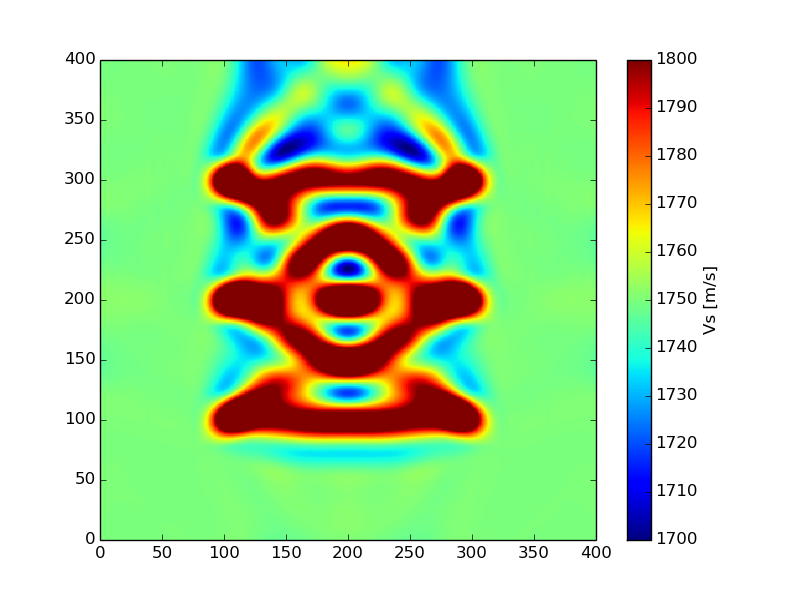

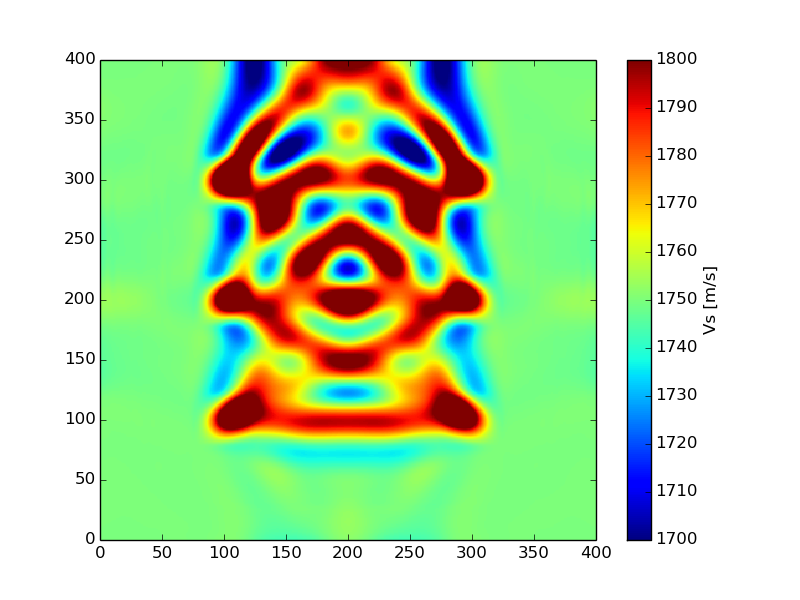

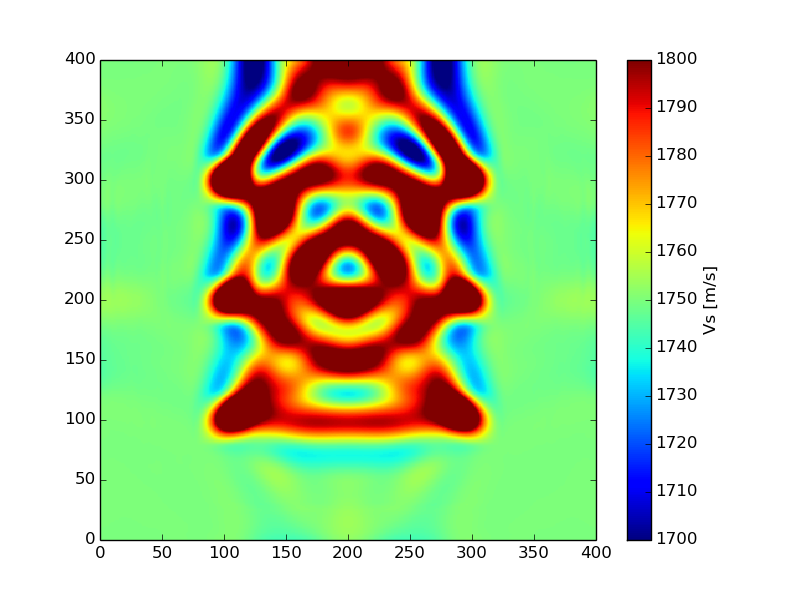

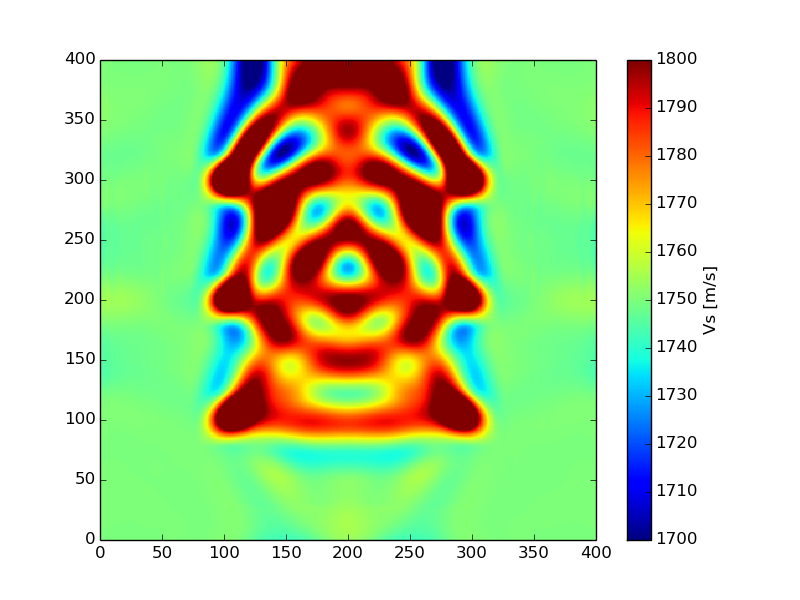

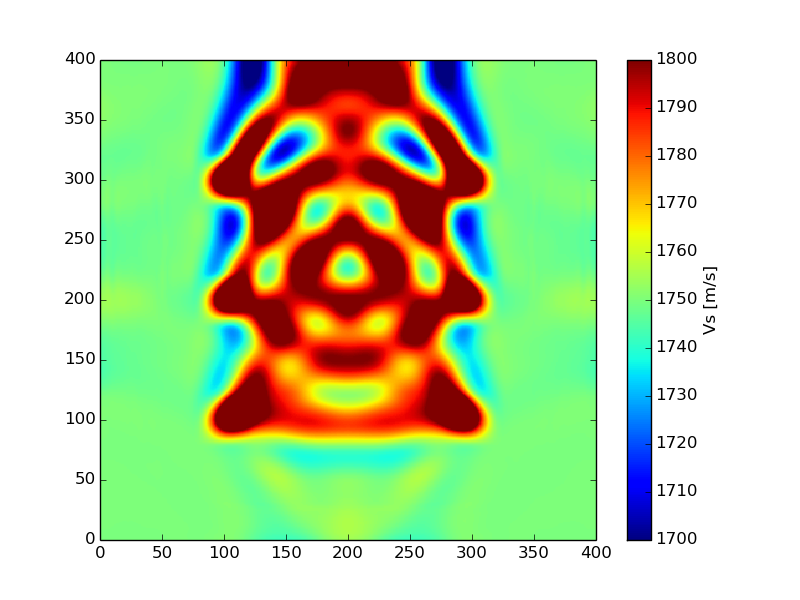

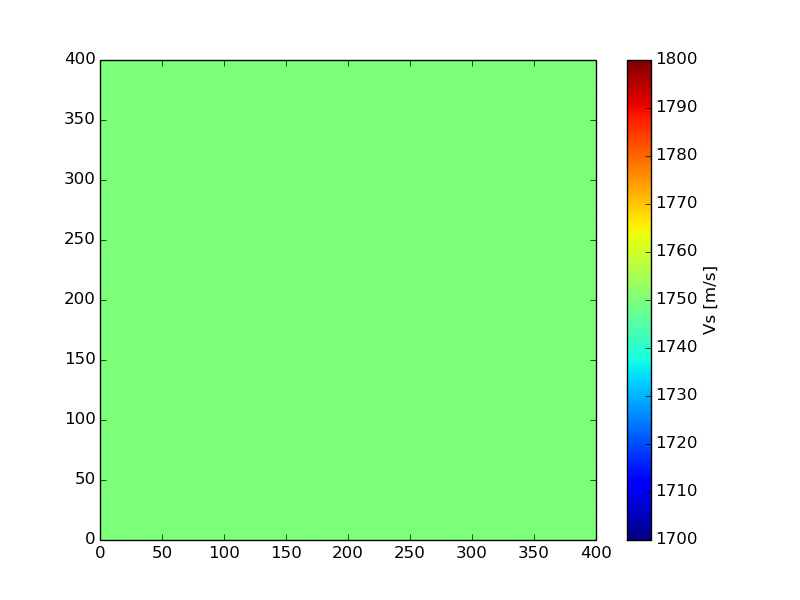

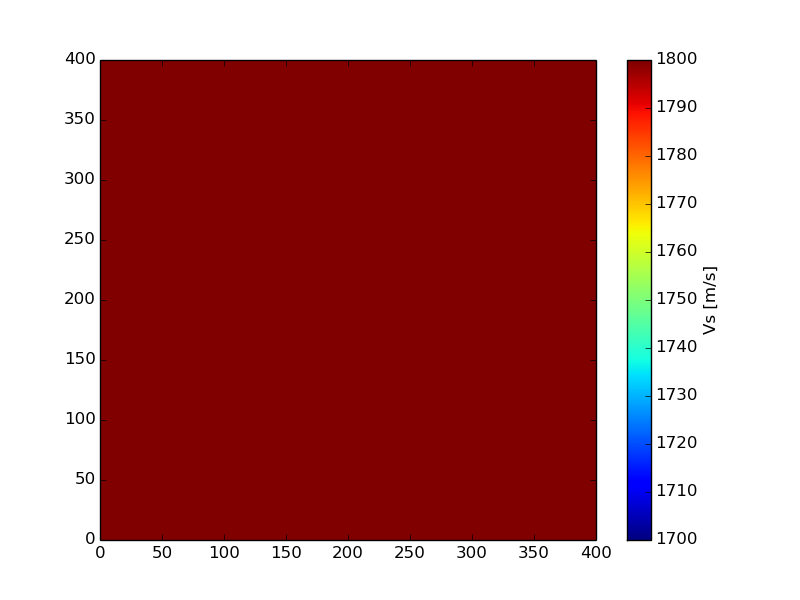

In [3]:
import os
cwd = os.getcwd()

os.chdir('Results') 
# collect all .png files in working dir
fs = !ls *.png

import IPython.display as dp

# create list of image objects
images = []
for ea in fs:
    images.append(dp.Image(filename=ea, format='png'))
    
    # display all images
for ea in images:
    dp.display_png(ea)

### Comments on the installation of seisflows
Two methods that you can try in case you haven't been able to run seisflows:

1) If you use the old version of specfem2d (specfem2d-d745c542), please compile specfem2d-d745c542 with a gfrontan version older than version 10. 

2) You can use the latest version of specfem2d. In this case, some additional steps are needed:

     - To run the checker example, first, update the Par_file and SOURCE files format to the one used in the latest version of specfem2d.

     - You need to modify seisflows code to recognize the .su files generated by this version specfem2d. In this case, you need to modify lines 128 and 195 of the file /packages/seisflows/solver/specfem2d.py, as shown below: 

       unix.rename('single_d.su', 'single.su', src)

Additionally, in the parameters.py, add the following line in the section #WORKFLOW: 

MINUSGRADIENT=0

### Specfem2D: Velocity model definition using tomography.xyz file
To add a heterogeneous velocity model a tomo_file.xyz file can be used in specfem2D, the file structure is explained below:

The header of the file should contain the following information: 

x_min z_min x_max z_max    
x_spacing z_spacing  
nx nz  
vp_min vp_max vs_min vs_max rho_min rho_max 

The next lines correspond to the mesh that describes the velocity model description in vector format (x, z, vp, vs, and rho)

In the Par_file, under # velocity and density models, define your model as follows:   
1 -1 0 0 0.5 0 0 0 0 0 0 0 0 0 0  

Finally, set the tomo.xyz file path. The following file applies if your tomo_file.xyz is locate in the DATA folder.   
TOMOGRAPHY_FILE = tomo_file.xyz   